Chapter 10

# 数据正交投影
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码从 `sklearn` 的 `load_iris` 数据集中提取了鸢尾花数据，计算其 Gram 矩阵和特征向量，并通过一系列矩阵操作和热图可视化了数据与特征向量的关系。具体步骤如下：

1. **Gram 矩阵计算**：首先定义了四个特征：萼片长度 \( x_1 \)、萼片宽度 \( x_2 \)、花瓣长度 \( x_3 \) 和花瓣宽度 \( x_4 \)，将原始数据矩阵 \( X \) 计算为矩阵的列。然后计算 Gram 矩阵 \( G = X^T X \) 和其特征值与特征向量：

   $$
   G = X^T X
   $$

   其中，\( G \) 为 \( 4 \times 4 \) 的对称矩阵，表示数据的相似度。

2. **特征向量的矩阵操作**：对于每个特征向量 \( v_j \)，定义以下几组计算：

   - **组 1**：将 \( X \) 投影到 \( v_j \) 上得到 \( z_j \)，即：
   
     $$
     z_j = X v_j
     $$
   
     通过热图展示 \( X \)、\( v_j \) 和 \( z_j \) 的结果。

   - **组 2**：使用 \( z_j \) 和 \( v_j^T \) 的乘积重建矩阵 \( X_j \)，即：
   
     $$
     X_j = z_j v_j^T
     $$
   
     展示 \( z_j \)、\( v_j^T \) 和 \( X_j \) 的结构。

   - **组 3**：构造矩阵 \( T_j \) 为 \( v_j v_j^T \)，这是一个投影矩阵，使任何向量在 \( v_j \) 上投影，满足 \( T_j T_j = T_j \) 的幂等性：

     $$
     T_j = v_j v_j^T
     $$

   - **组 4**：计算 \( X T_j \) 用于近似原始数据矩阵 \( X \) 中与 \( v_j \) 对应的部分：

     $$
     X_j = X T_j
     $$

3. **可视化**：通过 `seaborn` 绘制热图展示原始矩阵和计算过程中的中间矩阵，使矩阵乘法和特征向量投影的过程更直观可见。这种可视化方法帮助展示数据和特征向量之间的关系，以及 Gram 矩阵的正交基的构成和投影。

In [1]:
import seaborn as sns  # 导入数据可视化库
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库
import pandas as pd  # 导入数据处理库
from sklearn.datasets import load_iris  # 导入鸢尾花数据集加载器

## 加载数据并定义特征名称

In [2]:
iris = load_iris()

In [3]:
X = iris.data

In [4]:
y = iris.target

In [5]:
feature_names = ['Sepal length, x1', 'Sepal width, x2', 'Petal length, x3', 'Petal width, x4']
X_df = pd.DataFrame(X, columns=feature_names)  # 将 X 转换为数据框

## 提取数据和计算 Gram 矩阵

In [6]:
X = X_df.to_numpy()  # 将数据框转换为数组

In [7]:
G = X.T @ X  # 计算 Gram 矩阵

In [8]:
D, V = np.linalg.eig(G)  # 计算特征值和特征向量

## 定义函数：绘制热图

In [9]:
def heatmap(Matrices, Titles, Ranges, Equal_tags):
    M1, M2, M3 = Matrices  # 提取矩阵
    Title_1, Title_2, Title_3 = Titles  # 提取标题
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图
    
    plt.sca(axs[0])
    ax = sns.heatmap(M1, cmap='RdYlBu_r', vmin=Ranges[0][0], vmax=Ranges[0][1],
                     cbar=False, xticklabels=False, yticklabels=False)
    if Equal_tags[0]:
        ax.set_aspect("equal")
    plt.title(Title_1)
    
    plt.sca(axs[1])
    plt.title('=')
    plt.axis('off')
    
    plt.sca(axs[2])
    ax = sns.heatmap(M2, cmap='RdYlBu_r', vmin=Ranges[1][0], vmax=Ranges[1][1],
                     cbar=False, xticklabels=False, yticklabels=False)
    if Equal_tags[1]:
        ax.set_aspect("equal")
    plt.title(Title_2)
    
    plt.sca(axs[3])
    plt.title('@')
    plt.axis('off')
    
    plt.sca(axs[4])
    ax = sns.heatmap(M3, cmap='RdYlBu_r', vmin=Ranges[2][0], vmax=Ranges[2][1],
                     cbar=False, xticklabels=False, yticklabels=False)
    if Equal_tags[2]:
        ax.set_aspect("equal")
    plt.title(Title_3)

## 定义函数：绘制四组图形

In [10]:
def plot_four_figs(X, v_j, idx):
    z_j = X @ v_j  # 计算投影 z_j
    Titles = ['$X$', '$v_' + str(idx) + '$', '$z_' + str(idx) + '$']
    Ranges = [[-2, 11], [-1, 1], [-2, 11]]
    Equal_tags = [False, True, False]
    heatmap([X, v_j, z_j], Titles, Ranges, Equal_tags)  # 绘制第一个图形组

    X_j = z_j @ v_j.T  # 计算 X_j
    Titles = ['$z_' + str(idx) + '$', '$v_' + str(idx) + '^T$', '$X_' + str(idx) + '$']
    heatmap([z_j, v_j.T, X_j], Titles, Ranges, Equal_tags)  # 绘制第二个图形组

    T_j = v_j @ v_j.T  # 计算 T_j
    Titles = ['$v_' + str(idx) + '$', '$v_' + str(idx) + '^T$', '$T_' + str(idx) + '$']
    Ranges = [[-1, 1], [-1, 1], [-1, 1]]
    Equal_tags = [True, True, True]
    heatmap([v_j, v_j.T, T_j], Titles, Ranges, Equal_tags)  # 绘制第三个图形组

    T_j = X @ T_j  # 计算 X @ T_j
    Titles = ['$X$', '$T_' + str(idx) + '$', '$X_' + str(idx) + '$']
    Ranges = [[-2, 11], [-1, 1], [-2, 11]]
    Equal_tags = [False, True, False]
    heatmap([X, T_j, X_j], Titles, Ranges, Equal_tags)  # 绘制第四个图形组

## 绘制四个特征向量的图形

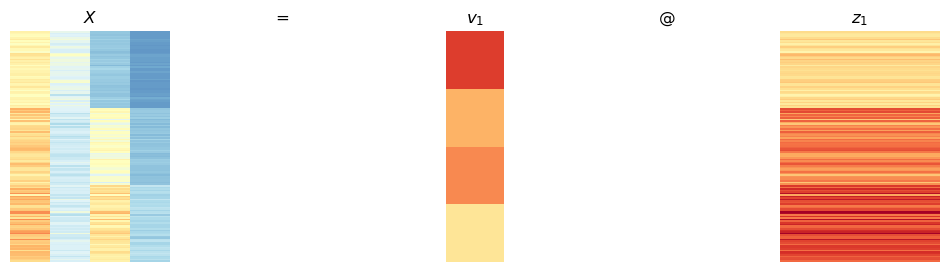

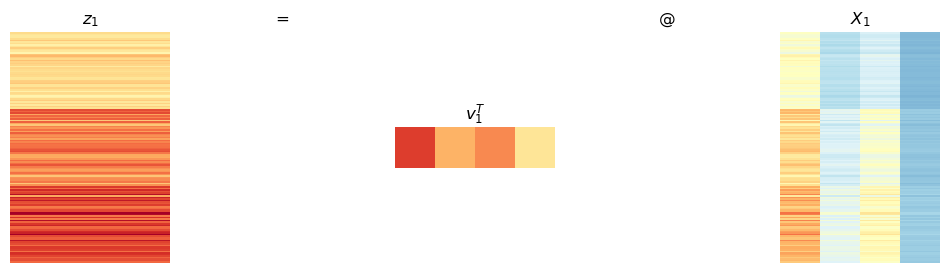

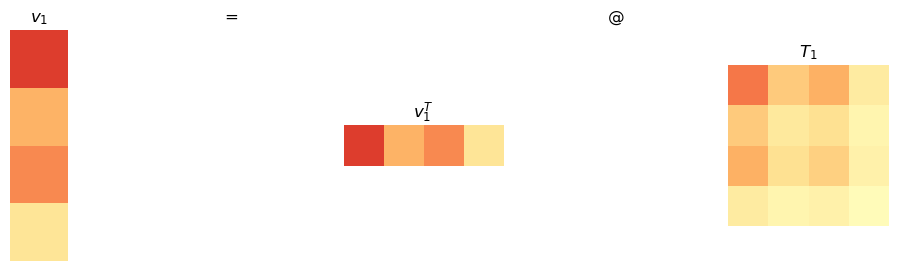

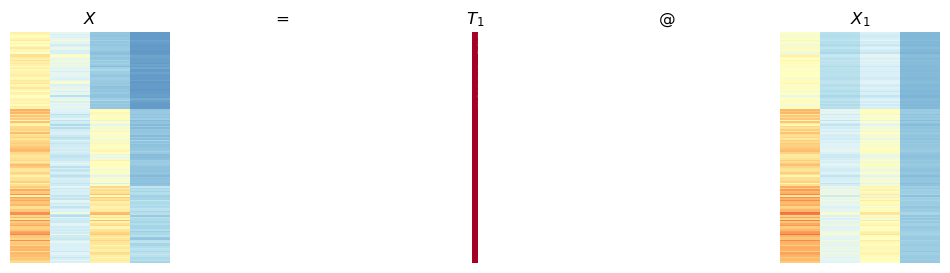

In [11]:
v1 = V[:, 0].reshape((-1, 1))
plot_four_figs(X, v1, 1)  # 第一个基向量

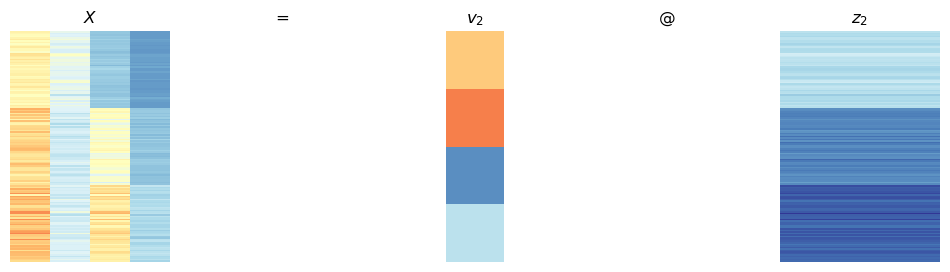

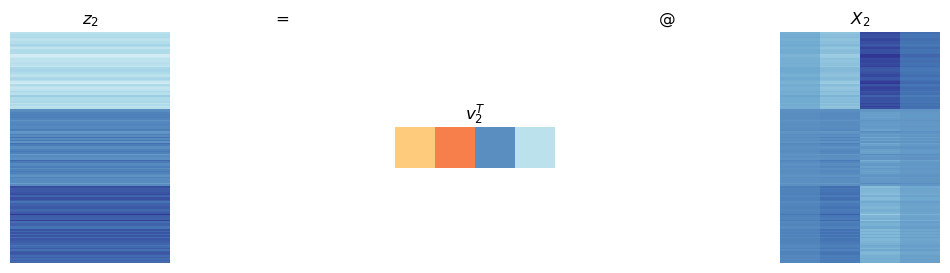

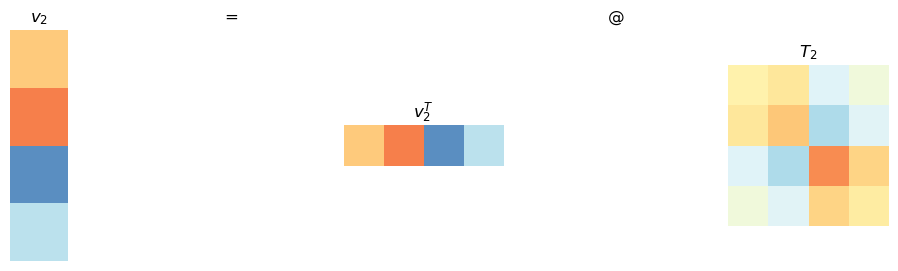

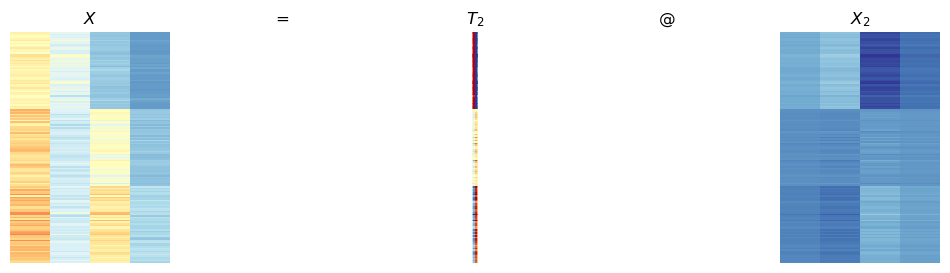

In [12]:
v2 = V[:, 1].reshape((-1, 1))
plot_four_figs(X, v2, 2)  # 第二个基向量

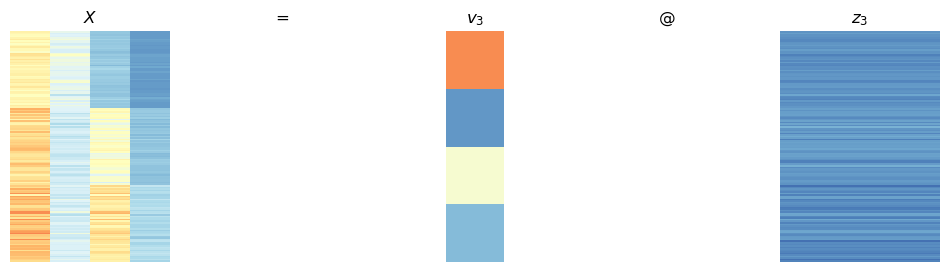

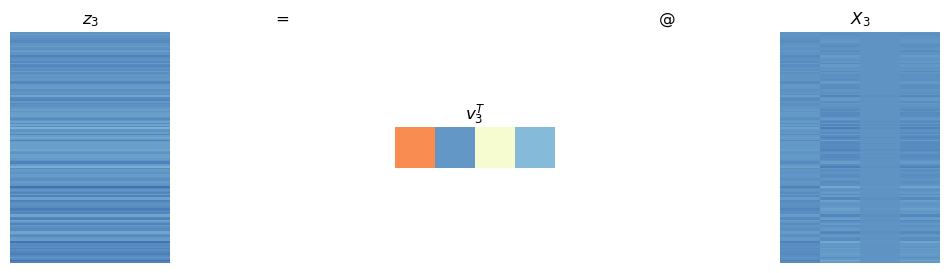

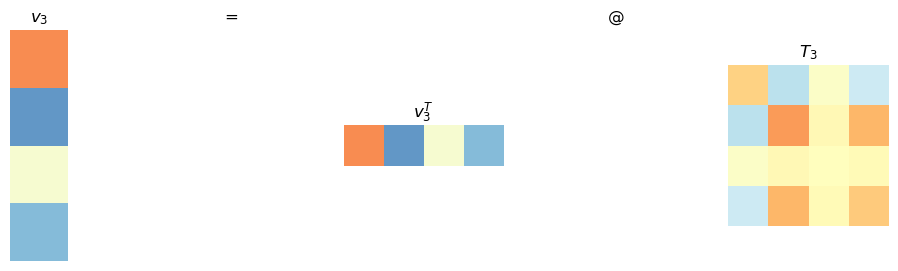

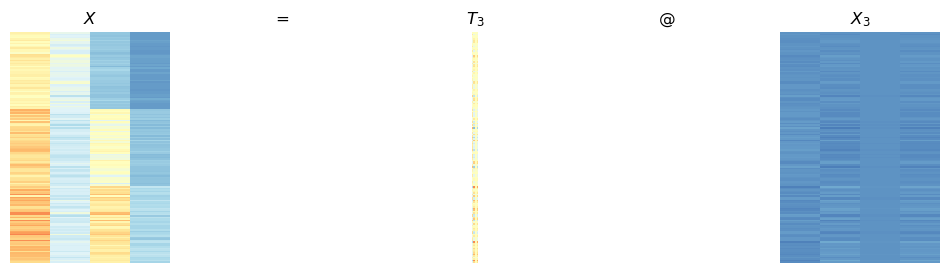

In [13]:
v3 = V[:, 2].reshape((-1, 1))
plot_four_figs(X, v3, 3)  # 第三个基向量

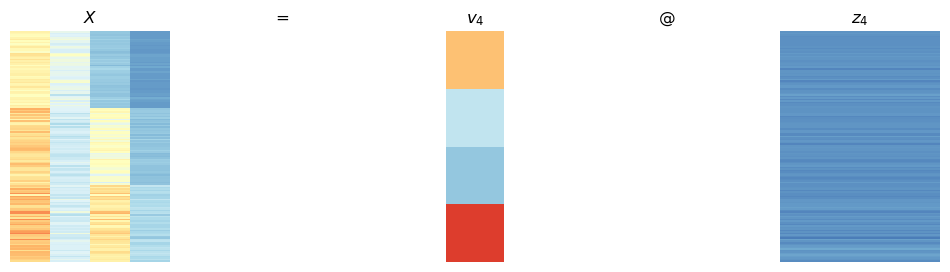

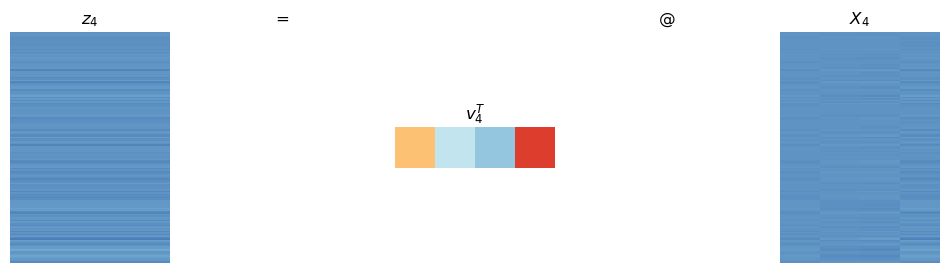

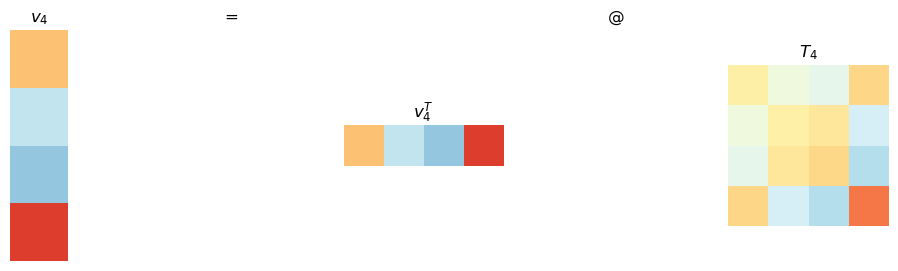

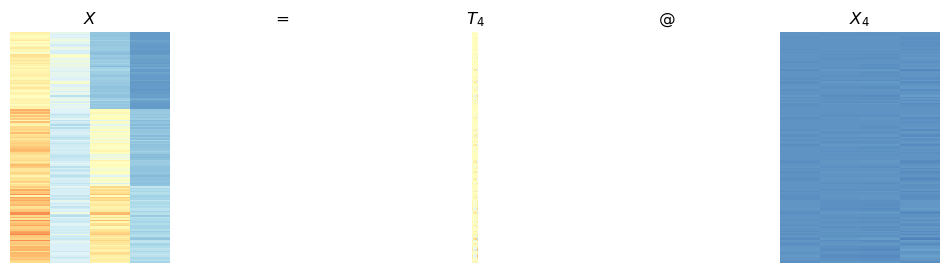

In [14]:
v4 = V[:, 3].reshape((-1, 1))
plot_four_figs(X, v4, 4)  # 第四个基向量